# TASK 3 : Customer Churn Prediction 

# Import required libraries:

In [41]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# load dataset:
df = pd.read_csv("D:\joyshree\dataset\Churn_Modelling.csv")


In [45]:
# View first five columns:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [46]:
# Checking null values:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
# Checking duplicate values:
df.duplicated().sum()

0

In [48]:
# Dropping duplicates:
df.drop_duplicates(inplace=True)

In [49]:
# Checking shape of dataframe:
df.shape

(10000, 14)

In [50]:
# Checking descriptive nature of dataset:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Simple Visualization

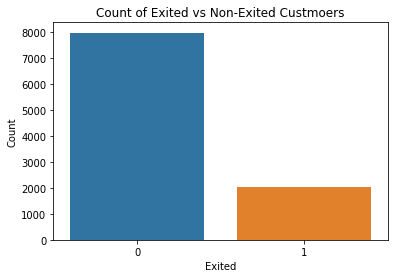

In [51]:
# Create the count plot
sns.countplot(data=df, x='Exited')

# Adding labels and a title
plt.xlabel("Exited")
plt.ylabel("Count")
plt.title("Count of Exited vs Non-Exited Custmoers")

# Show the plot
plt.show()

In [52]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

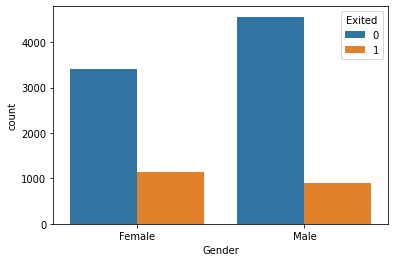

In [53]:
sns.countplot(x='Gender',hue='Exited',data=df)

<Axes: xlabel='Geography', ylabel='count'>

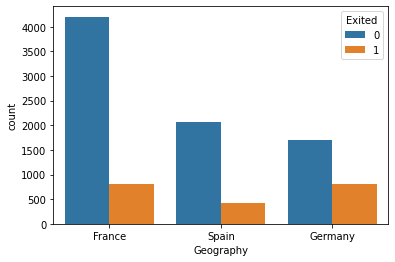

In [54]:
sns.countplot(x='Geography',hue='Exited',data=df)

## Data Preprocessing

In [55]:
# Dropping unnecessary columns:
df = df.drop(['CustomerId', 'RowNumber'],axis=1)

In [56]:
#checking shape of dataframe again:
df.shape 

(10000, 12)

In [57]:
# Importing label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [58]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

C:\Users\JOYSHREE\AppData\Local\Temp\ipykernel_18552\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:


In [59]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0


In [60]:
# Separating Input and output features:
x = df.drop('Exited',axis=1)
y = df.Exited

In [61]:
x.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1115,228,0,0,24,2,0.00,0,1,1,101348.88
1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58
2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57
3,289,308,0,0,21,1,0.00,1,0,0,93826.63
4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10


In [62]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## Scaling the dataset

In [63]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [64]:
x_feature = ss.fit_transform(x)

In [65]:
x_feature[0]

array([-0.46418322, -0.32733113, -0.90188624, -1.09598752,  0.29379269,
       -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
        0.02188649])

## Train-Test-Split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
xtrain,xtest,ytrain,ytest=train_test_split(x_feature,y,test_size=0.2,random_state=42)

In [68]:
xtrain.shape

(8000, 11)

In [69]:
ytrain.shape

(8000,)

In [70]:
xtest.shape

(2000, 11)

In [71]:
ytest.shape

(2000,)

## Model Selection

In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [73]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [74]:
predict = lr.predict(xtest)

In [75]:
# Predicting customer churn:
for i in predict[0:15]:
    if i == 0:
        print("Customer Will Not Churn")
    else:
        print("Customer Will Churn")

Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Churn
Customer Will Not Churn
Customer Will Not Churn
Customer Will Not Churn


In [76]:
print(lr.score(xtest,ytest)*100, '%')

81.75 %


## Performance Metrics

In [77]:
from sklearn.metrics import accuracy_score
#accuracy score
accuracy_score(ytest,predict)

0.8175

## Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix

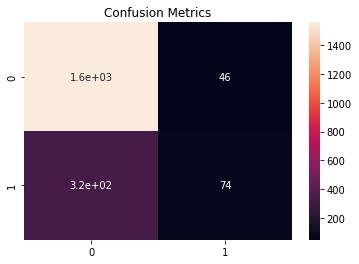

In [79]:
Cm = confusion_matrix(ytest,predict)
ax = plt.axes()
sns.heatmap(Cm, annot=True,
           annot_kws={'size':10},
           #xticklabels=labels,
           #yticklabels=labels,
            ax=ax
           )

plt.title("Confusion Metrics")
plt.show()

In [80]:
# Classification Report:
from sklearn.metrics import classification_report
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1607
           1       0.62      0.19      0.29       393

    accuracy                           0.82      2000
   macro avg       0.72      0.58      0.59      2000
weighted avg       0.79      0.82      0.78      2000

